In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import json

In [71]:
data = pd.DataFrame(columns=['date', 'indice'])
with open('../data/st_test.json', 'r') as file:
        d = json.loads(file.read())

        data['date'] = d['Indices']['NDVI']['Serie Processada']['Data']
        data['indice'] = d['Indices']['NDVI']['Serie Processada']['Indice']

In [72]:
data

,date,indice
0,2019-12-11,0.003475
1,2019-12-19,0.016556
2,2020-01-09,0.026148
3,2020-01-17,-0.003934
4,2020-01-25,0.014491
5,2020-03-05,-0.005639
6,2020-03-29,0.018291
7,2020-04-14,0.092785
8,2020-06-09,0.034286
9,2020-07-03,0.021134


In [73]:
data.dtypes

date       object
indice    float64
dtype: object

In [74]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

In [75]:
data = data.set_index('date')
data = data.groupby(data.index).mean()
data = data.asfreq("M",method='backfill')
data = data.sort_index()
data.head(10)

,indice
date,
2019-12-31,0.026148
2020-01-31,-0.005639
2020-02-29,-0.005639
2020-03-31,0.092785
2020-04-30,0.034286
2020-05-31,0.034286
2020-06-30,0.021134
2020-07-31,0.010591


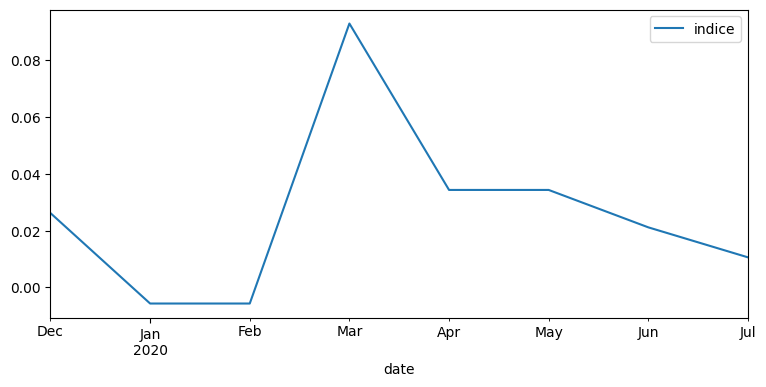

In [76]:
fig, ax = plt.subplots(figsize=(9, 4))
data['indice'].plot(ax=ax, label='indice')
ax.legend()